In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset from UCI repository
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

# Assign column names
df.columns = ['age', 'workclass', 'fnlwft', 'education', 'education_num', 'martial_status', 'occupation',
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
              'native_country', 'salary']

# Remove rows with missing values ('?')
df_cleaned = df[~df.apply(lambda x: x.astype(str).str.contains('\\?')).any(axis=1)].reset_index(drop=True)

# Save to CSV for later use
df_cleaned.to_csv('updated_dataset.csv', index=False)
df_cleaned.head()

,age,workclass,fnlwft,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwft          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   martial_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  salary          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


In [4]:
df2 = pd.read_csv('updated_dataset.csv')
df2['salary'] = df2['salary'].apply(lambda x: 1 if '>50K' in x else 0)

numeric_df = df2.select_dtypes(include='number')
corr = numeric_df.corr()

# Display styled correlation matrix
corr.style.set_caption("Correlation Matrix") \
          .format(precision=3) \
          .background_gradient(cmap="RdBu", vmin=-0.5, vmax=0.5)

,age,fnlwft,education_num,capital_gain,capital_loss,hours_per_week,salary
age,1.000,-0.077,0.044,0.080,0.060,0.102,0.242
fnlwft,-0.077,1.000,-0.045,0.000,-0.010,-0.023,-0.009
education_num,0.044,-0.045,1.000,0.124,0.080,0.153,0.335
capital_gain,0.080,0.000,0.124,1.000,-0.032,0.080,0.221
capital_loss,0.060,-0.010,0.080,-0.032,1.000,0.052,0.150
hours_per_week,0.102,-0.023,0.153,0.080,0.052,1.000,0.229
salary,0.242,-0.009,0.335,0.221,0.150,0.229,1.000


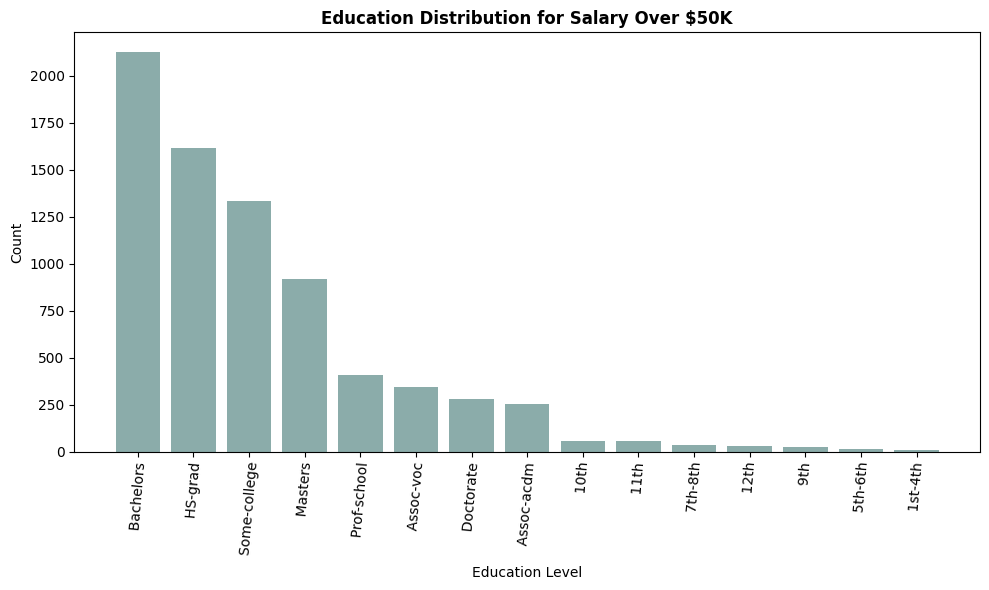

In [23]:
filtered_df = df_cleaned[df_cleaned['salary'].str.contains('>50K')]
education_counts = filtered_df['education'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(education_counts.index, education_counts.values, color='#8BACAA')
plt.xticks(rotation=85)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Distribution for Salary Over $50K', fontweight='bold')
plt.tight_layout()
plt.show()


The higher the ratio, the more likely the salary will be >50K:

Preschool: 0.00
1st-4th: 0.04
5th-6th: 0.04
7th-8th: 0.07
9th: 0.06
10th: 0.08
11th: 0.06
12th: 0.08
HS-grad: 0.20
Some-college: 0.25
Assoc-voc: 0.36
Assoc-acdm: 0.34
Bachelors: 0.73
Masters: 1.29
Prof-school: 2.99
Doctorate: 2.95


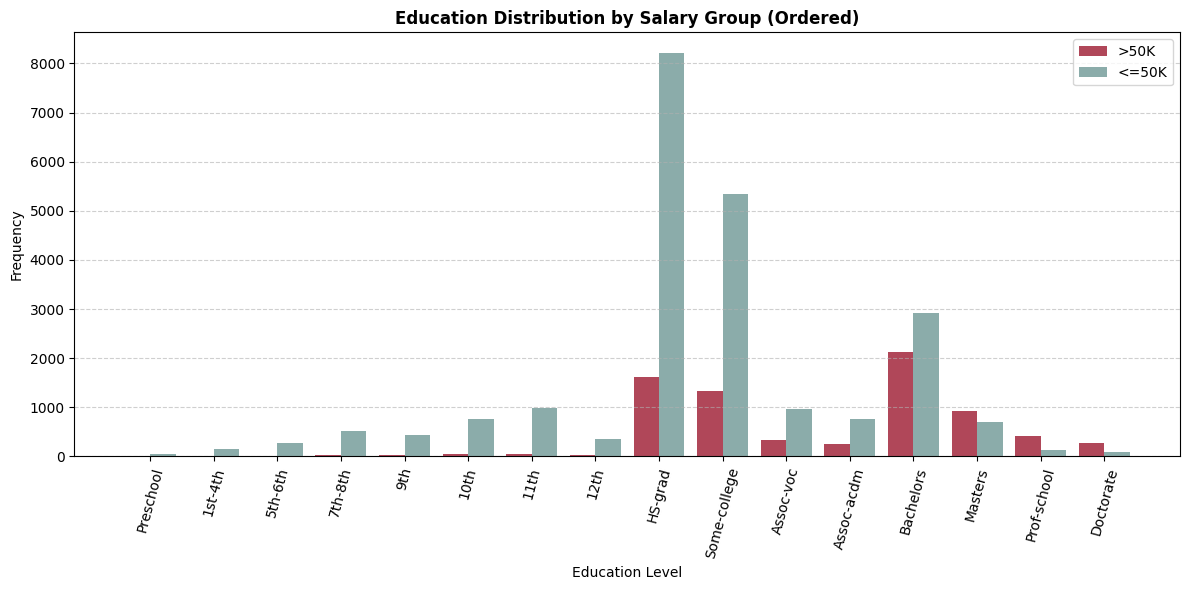

In [24]:
# Filter high and low salary groups from cleaned data
high_salary_df = df_cleaned[df_cleaned['salary'].str.contains('>50K')]
low_salary_df = df_cleaned[df_cleaned['salary'].str.contains('<=50K')]

# Count education levels
highEducation = high_salary_df['education'].value_counts()
lowEducation = low_salary_df['education'].value_counts()

# Define education level order
edu_order_map = {
    'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, '9th': 5, '10th': 6, '11th': 7,
    '12th': 8, 'HS-grad': 9, 'Some-college': 10, 'Assoc-voc': 11, 'Assoc-acdm': 12,
    'Bachelors': 13, 'Masters': 14, 'Prof-school': 15, 'Doctorate': 16
}

# Ensure index labels are clean
highEducation.index = highEducation.index.str.strip()
lowEducation.index = lowEducation.index.str.strip()

# Align and reorder counts by education level
alignedCounts = highEducation.align(lowEducation, fill_value=0)
sorted_index = sorted(alignedCounts[0].index, key=lambda x: edu_order_map.get(x.strip(), 100))
high_sorted = alignedCounts[0].reindex(sorted_index)
low_sorted = alignedCounts[1].reindex(sorted_index)

# Calculate high-to-low salary ratio
education_ratios = high_sorted / low_sorted.replace(0, np.nan)

# Print ratios
print("The higher the ratio, the more likely the salary will be >50K:\n")
for education, ratio in education_ratios.items():
    print(f'{education}: {ratio:.2f}' if not np.isnan(ratio) else f'{education}: No low-salary data')

# Plotting
bar_width = 0.4
x = np.arange(len(high_sorted))

plt.figure(figsize=(12, 6))
plt.bar(x, high_sorted.values, width=bar_width, label='>50K', color='#B04759')
plt.bar(x + bar_width, low_sorted.values, width=bar_width, label='<=50K', color='#8BACAA')

plt.xticks(x + bar_width / 2, high_sorted.index, rotation=75)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Education Distribution by Salary Group (Ordered)', fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


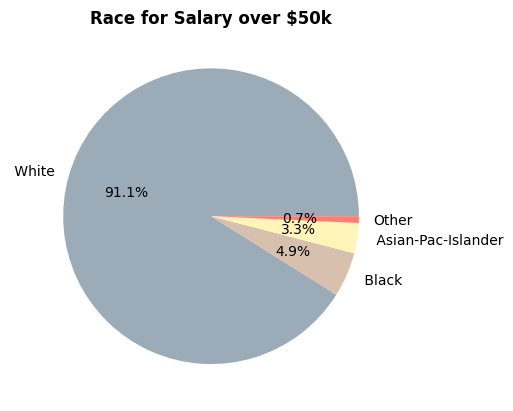

In [25]:
# Calculate the frequency of each education level
education_counts = filtered_df['race'].value_counts().to_dict()

# Filter out values with percentages less than 1%
threshold = 0.01
total_count = sum(education_counts.values())
filtered_counts = {
    label: count
    for label, count in education_counts.items()
    if (count / total_count) >= threshold
}

other_count = sum(count for count in education_counts.values() if (count / total_count) < threshold)
# Other added to the pie chart
filtered_counts['Other'] = other_count

labels = list(filtered_counts.keys())
sizes = list(filtered_counts.values())

colors = ['#9BABB8', '#D7C0AE','#FFF5B8','#FA8072','#C4D7B2','#FCAEAE','#F7D060']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)

# Add a title
plt.title('Race for Salary over $50k', fontweight="bold")

# Display the chart
plt.show()

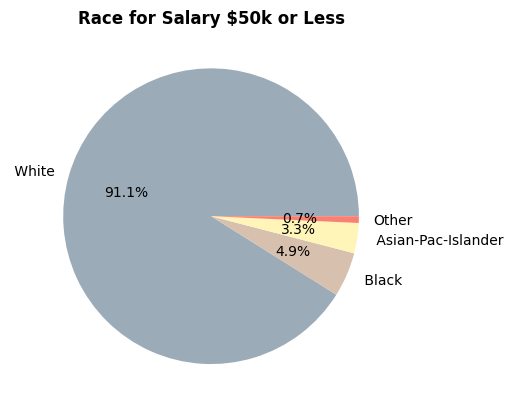

In [26]:
# Calculate the frequency of each education level
education_counts = filtered_df['race'].value_counts().to_dict()

# Filter out values with percentages less than 1.3%
threshold = 0.013
total_count = sum(education_counts.values())
filtered_counts = {
    label: count
    for label, count in education_counts.items()
    if (count / total_count) >= threshold
}

# Calculate the sum of the counts below 1% and set them as Other
other_count = sum(count for count in education_counts.values() if (count / total_count) < threshold)

# Other added to the pie chart
filtered_counts['Other'] = other_count

labels = list(filtered_counts.keys())
sizes = list(filtered_counts.values())

colors = ['#9BABB8', '#D7C0AE','#FFF5B8','#FA8072','#C4D7B2','#FCAEAE','#F7D060']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Race for Salary $50k or Less', fontweight="bold")

plt.show()

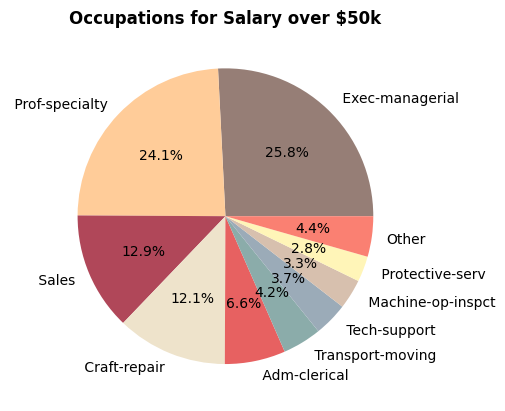

In [27]:

education_counts = filtered_df['occupation'].value_counts().to_dict()

# Filter out values with percentages less than 2%
threshold = 0.02
total_count = sum(education_counts.values())
filtered_counts = {
    label: count
    for label, count in education_counts.items()
    if (count / total_count) >= threshold
}

other_count = sum(count for count in education_counts.values() if (count / total_count) < threshold)
# Add the Other to the pie chart
filtered_counts['Other'] = other_count

labels = list(filtered_counts.keys())
sizes = list(filtered_counts.values())

# Found nice solors to be set on my pie chart
colors = ['#967E76','#ffcc99', '#B04759','#EEE3CB', '#E76161','#8BACAA','#9BABB8', '#D7C0AE','#FFF5B8','#FA8072','#C4D7B2','#FCAEAE','#F7D060']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Occupations for Salary over $50k', fontweight="bold")

plt.show()

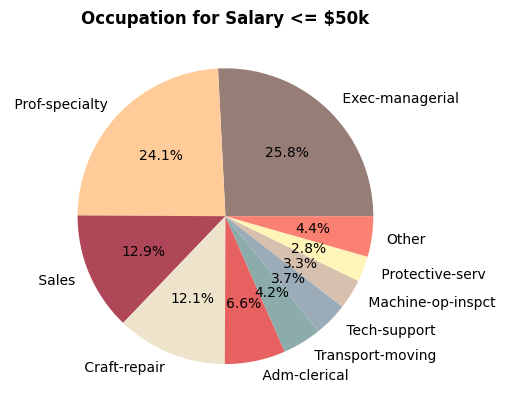

In [28]:
# Calculate the frequency of each education level
education_counts = filtered_df['occupation'].value_counts().to_dict()

# 2%
threshold = 0.02
total_count = sum(education_counts.values())
filtered_counts = {
    label: count
    for label, count in education_counts.items()
    if (count / total_count) >= threshold
}

# Calculate the sum of the counts below the threshold
other_count = sum(count for count in education_counts.values() if (count / total_count) < threshold)

filtered_counts['Other'] = other_count

labels = list(filtered_counts.keys())
sizes = list(filtered_counts.values())

colors = ['#967E76','#ffcc99', '#B04759','#EEE3CB', '#E76161','#8BACAA','#9BABB8', '#D7C0AE','#FFF5B8','#FA8072','#C4D7B2','#FCAEAE','#F7D060']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors)

# Add a title
plt.title('Occupation for Salary <= $50k', fontweight="bold")

plt.show()

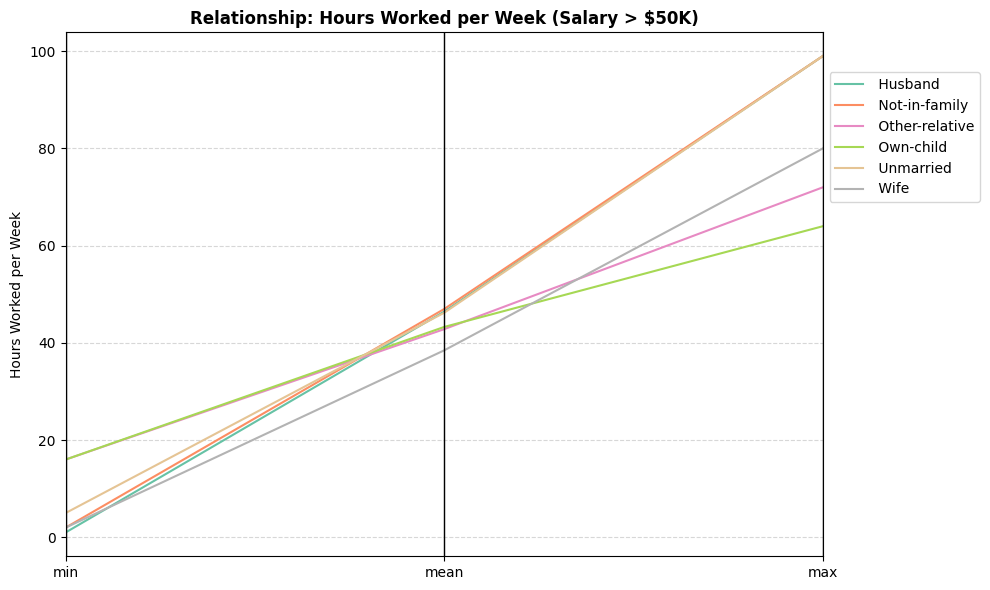

In [31]:
# Filter cleaned data for salary > $50K
filtered_data = df_cleaned[df_cleaned['salary'].str.contains('>50K')]

# Group by relationship and compute min, mean, and max of hours worked
grouped_data = filtered_data.groupby('relationship')['hours_per_week'].agg(['min', 'mean', 'max']).reset_index()

# Plot parallel coordinates
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(grouped_data, class_column='relationship', colormap='Set2')

# Customize plot
plt.title("Relationship: Hours Worked per Week (Salary > $50K)", fontweight='bold')
plt.ylabel("Hours Worked per Week")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.tight_layout()
plt.show()


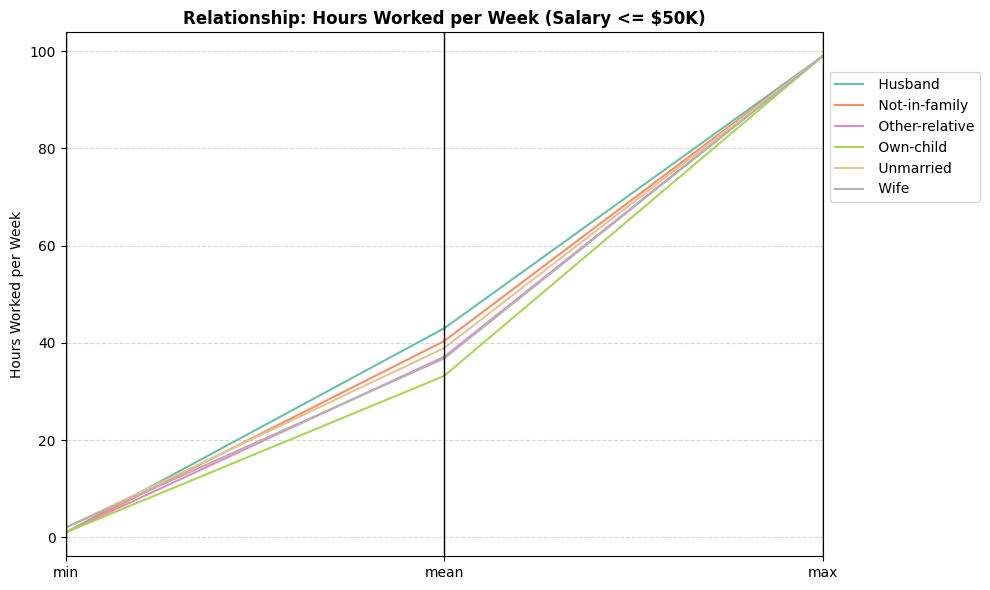

In [33]:
# Filter cleaned data for salary <= $50K
filtered_data = df_cleaned[df_cleaned['salary'].str.contains('<=50K')]

# Group by relationship the I compute the min, mean, and max of hours worked
grouped_data = filtered_data.groupby('relationship')['hours_per_week'].agg(['min', 'mean', 'max']).reset_index()

# Plot parallel coordinates
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(grouped_data, class_column='relationship', colormap='Set2')

plt.title("Relationship: Hours Worked per Week (Salary <= $50K)", fontweight='bold')
plt.ylabel('Hours Worked per Week')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.tight_layout()
plt.show()